# State Transition Visualisation

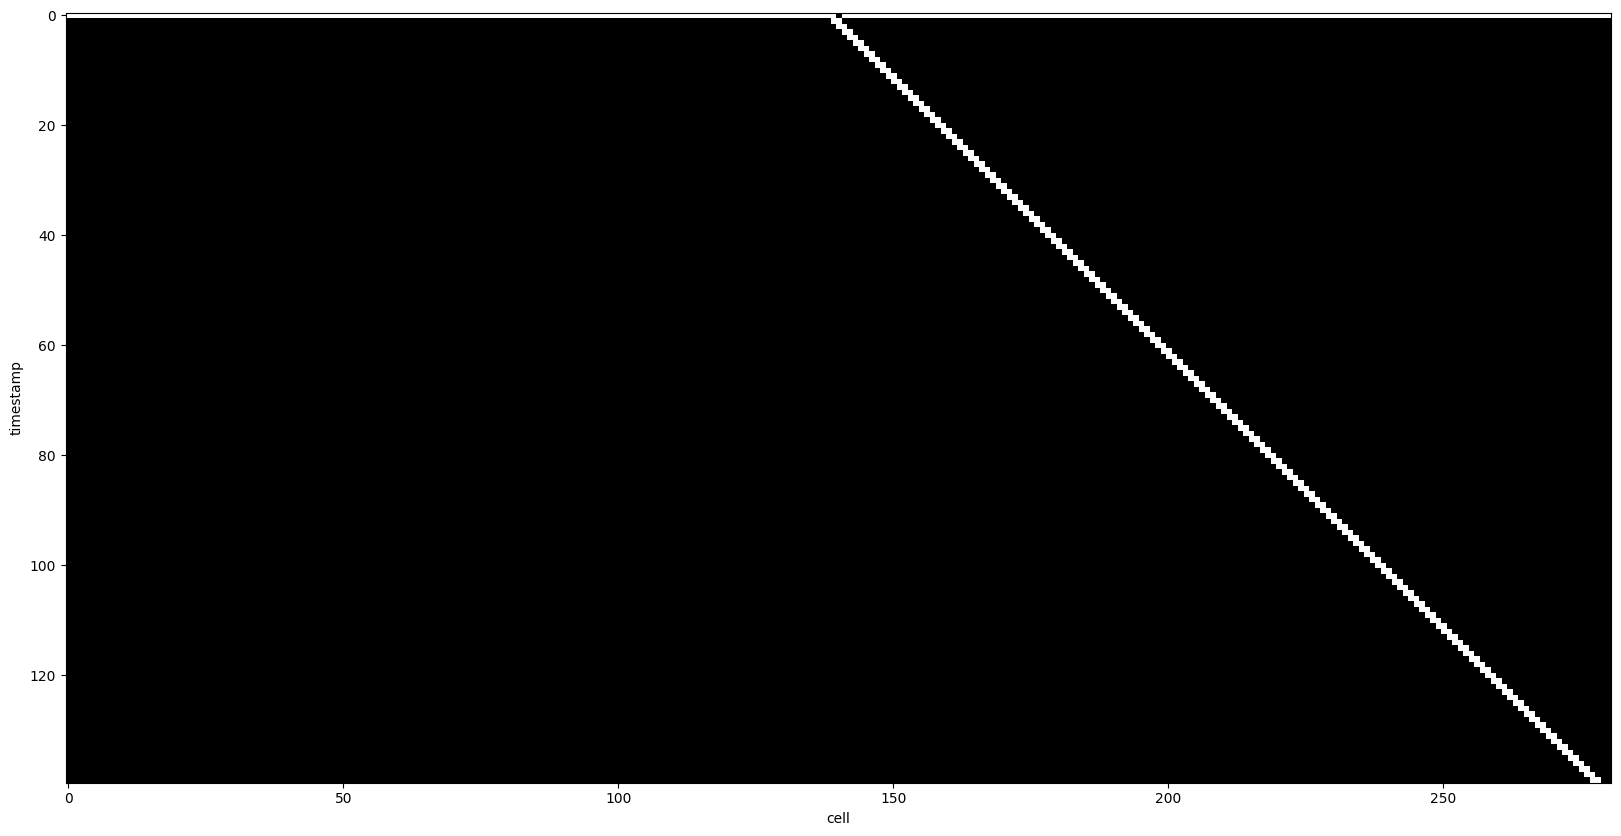

In [147]:
import random
import numpy as np
import matplotlib.pyplot as plt


# this lambda function is a helper function that convert the rule number in binary format of 8 characters
binary_r = lambda r: format(r, f'0{8}b')

def StateTGen(rule_1,time,length):
    history = []
    automata_rule_1 = {}
    
    r_1 = binary_r(rule_1)
    
    container_bin = [format(i, f'0{3}b') for i in range(2**3)][::-1]    # output:['111', '110', '101', '100', '011', '010', '001', '000']
    for i,key in enumerate(container_bin):
        automata_rule_1[key] = r_1[i]
      
    current = length*'0'+'1'+length*'0'      # expand as much as you like
    
    while time>0:
        history.append(np.array([int(i) for i in current]))
        exec = current[-1] + current + current[0]
        new = ''                                                
        for i in range(len(current)):                            
            new += automata_rule_1[exec[i:i+3]]                                               
        current = new
        time -= 1
        
    return history

time = 140
rule = 209
length = 140

# rule_1 = 30 : timestamp = 10 ; latticeLength = 5 ; 
history1 = StateTGen(rule,time,length)       # enter the details

plt.figure(figsize=(20,10))
plt.imshow((history1), cmap="binary", interpolation="nearest")


plt.xlabel("cell")
plt.ylabel("timestamp")

plt.show()
        
    

# Hybrid Cellular Automaton ( Two rules )

In the following code, rule vectors are added as rule_1 and rule_2 parameter. 

Type 1  When the cells are partitioned into set randomly for each rule

Type 2  When the cells are applied by each of the two rules alternatively

0111101010


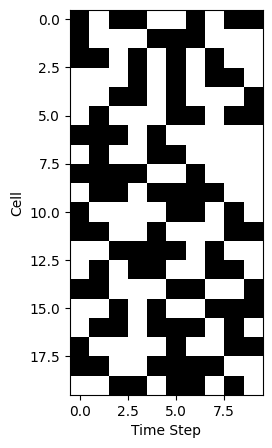

In [109]:
import random
import numpy as np
import matplotlib.pyplot as plt
#This lambda function create an arbitrary binary strings of length n

random_binary_string = lambda n: ''.join(random.choice('01') for _ in range(n)) 

# this lambda function is a helper function that convert the rule number in binary format of 8 characters
binary_r = lambda r: format(r, f'0{8}b')

def hybridCA(rule_1,rule_2,time,n_length,type):
    history = []
    automata_rule_1 = {}
    automata_rule_2 = {}
    r_1 = binary_r(rule_1)
    r_2 = binary_r(rule_2)
    container_bin = [format(i, f'0{3}b') for i in range(2**3)][::-1]    # output:['111', '110', '101', '100', '011', '010', '001', '000']
    for i,key in enumerate(container_bin):
        automata_rule_1[key] = r_1[i]
        automata_rule_2[key] = r_2[i]
    
    random_index = set(random.sample(range(0, n_length), n_length//2))   # partition the indices into types for each rule randomly
    current = random_binary_string(n_length)
    print(current)
    while time>0:
        
        exec = '0' + current + '0'
        new = ''
        if type == 1:                                                     # type 1 when the index are randomly partitioned for each rule
            for i in range(len(current)):                            
                if i in random_index:
                    new += automata_rule_1[exec[i:i+3]]                   # this piece of code ensure the hybrid nature of automaton                                
                else:                                                     # rule_1 acts on half of the index, rule_2 acts on other half
                    new += automata_rule_2[exec[i:i+3]] 
        if type == 2:                                                     # type 2 when the rules act on alternative indices
            for i in range(len(current)):                        
                if i%2:
                    new += automata_rule_1[exec[i:i+3]]    
                else:           
                    new += automata_rule_2[exec[i:i+3]] 

        current = new
        time -= 1
        history.append(np.array([int(i) for i in current]))
    return history

type = 1       # random partition of cells
# rule_1 = 30 ; rule_2 = 120 ; timestamp = 10 ; latticeLength = 5 ; 
history1 = hybridCA(150,150,20,10,type)       # enter the details

plt.figure(figsize=(10, 5))
plt.imshow((history1), cmap="binary", interpolation="nearest")

plt.xlabel("Time Step")
plt.ylabel("Cell")

plt.show()
        
    